# Problem statement 
- In this case study, it is provided with images of traffic signs and the **goal is to train a Deep Network to classify them**
- **The dataset contains 43 different classes of images**
- Classes are as listed below: 
  - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
  - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
  - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
  - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
  - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
  - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
  - (18, b'General caution') (19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right') (21, b'Double curve')
  - (22, b'Bumpy road') (23, b'Slippery road')
  - (24, b'Road narrows on the right') (25, b'Road work')
  - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
  - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')
  - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
  - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
  - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
  - (40, b'Roundabout mandatory') (41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')
- The network used is called LeNet that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pickle      # module used for serialization and deserialization of python object

In [3]:
from sklearn.utils import shuffle

In [4]:
import tensorflow as tf

# About Data

In [5]:
# load data from drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
'''

# load pickel data with pandas 
training_data = pd.read_pickle('/content/drive/My Drive/Colab Notebook/Dataset/traffic_signal_train_images.p')
# convert dict object into pandas DataFrame
train = pd.DataFrame(training_data.items())

'''

#Open the pickle file
training_data = open('/content/drive/My Drive/Colab Notebook/Dataset/traffic_signal_train_images.p',"rb")
#Use pickle.load() to load it to a var.
train = pickle.load(training_data)

# validation data
validation_data = open('/content/drive/My Drive/Colab Notebook/Dataset/traffic_signal_validation_image.p',"rb")
val = pickle.load(validation_data)

# test data
test_data = open('/content/drive/My Drive/Colab Notebook/Dataset/traffic_signal_test_images.p',"rb")
test = pickle.load(test_data)

In [7]:
# pickel returns dict object
type(train)

dict

In [39]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = val['features'], val['labels']
X_test, y_test = test['features'], test['labels']

In [9]:
print(f' X_train  4D, y_train {X_train.shape, y_train} \n X_validation 4D, y_validation {X_validation.shape, y_validation.shape} \n X_test 4D, y_test {X_test.shape, y_test.shape}')

 X_train  4D, y_train ((34799, 32, 32, 3), array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)) 
 X_validation 4D, y_validation ((4410, 32, 32, 3), (4410,)) 
 X_test 4D, y_test ((12630, 32, 32, 3), (12630,))


# Visualization

class: 10


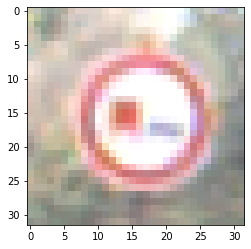

In [10]:
i = np.random.randint(0, 34799)
plt.imshow(X_train[i])
print(f'class: {y_train[i]}')

class: 18


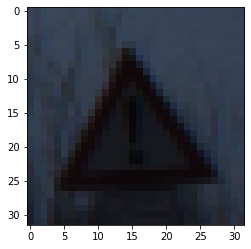

In [11]:
i = np.random.randint(0, 12630)
plt.imshow(X_test[i])
print(f'class: {y_test[i]}')

class: 5


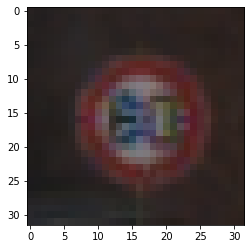

In [12]:
i = np.random.randint(0, 4410)
plt.imshow(X_validation[i])
print(f'class: {y_validation[i]}')

# Data Prep 

In [13]:
X_train, y_train = shuffle(X_train, y_train)

In [40]:
# convert color image into grey scale image , '3' is number of channels (RGB)
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [15]:
X_test_gray.shape

(12630, 32, 32, 1)

In [16]:
# summarize pixel values
print(f' {X_train_gray.min()}, {X_train_gray.max()}, {X_train_gray.mean()}, {X_train_gray.std()}')


 3.666666666666666, 255.0, 82.6775890369965, 66.00979575215898


In [41]:
# Normalize the data ?
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

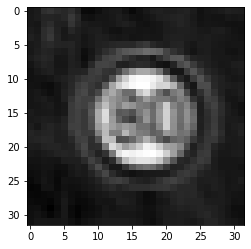

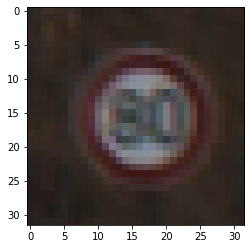

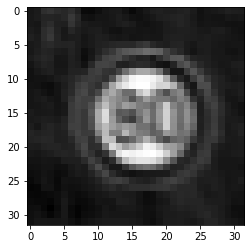

In [18]:
i = np.random.randint(0, 34799)
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# Train Model 

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [19]:
# Define model 
LeNet = tf.keras.models.Sequential()
# add 1st convolution layer 
LeNet.add(tf.keras.layers.Conv2D(6,(5,5), activation='relu', input_shape = (32,32,1)))
LeNet.add(tf.keras.layers.AveragePooling2D())

# add 2nd convolution layer
LeNet.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(tf.keras.layers.AveragePooling2D())

# add flatten layer 
LeNet.add(tf.keras.layers.Flatten())

# add 1st fully connected layer 
LeNet.add(tf.keras.layers.Dense(units = 120, activation = 'relu' ))

# add 2nd fully connected layer 
LeNet.add(tf.keras.layers.Dense(units = 84, activation = 'relu'))

# output layer 
LeNet.add(tf.keras.layers.Dense(units = 43, activation = 'softmax'))

In [20]:
# model summary
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [21]:
# compile model 
LeNet.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [22]:
# fit model on data
epochs_hist = LeNet.fit(X_train_gray_norm, y_train, epochs=50, batch_size=512, validation_data= (X_validation_gray_norm, y_validation))

Epoch 1/50
68/68 [==============================] - 12s 175ms/step - loss: 3.2503 - accuracy: 0.1623 - val_loss: 2.8414 - val_accuracy: 0.2855
Epoch 2/50
68/68 [==============================] - 12s 178ms/step - loss: 1.8106 - accuracy: 0.5104 - val_loss: 1.5185 - val_accuracy: 0.5277
Epoch 3/50
68/68 [==============================] - 12s 179ms/step - loss: 0.9813 - accuracy: 0.7180 - val_loss: 1.0164 - val_accuracy: 0.6850
Epoch 4/50
68/68 [==============================] - 12s 179ms/step - loss: 0.6851 - accuracy: 0.8107 - val_loss: 0.8245 - val_accuracy: 0.7533
Epoch 5/50
68/68 [==============================] - 12s 176ms/step - loss: 0.5418 - accuracy: 0.8507 - val_loss: 0.7825 - val_accuracy: 0.7664
Epoch 6/50
68/68 [==============================] - 12s 177ms/step - loss: 0.4480 - accuracy: 0.8795 - val_loss: 0.7206 - val_accuracy: 0.7961
Epoch 7/50
68/68 [==============================] - 12s 177ms/step - loss: 0.3803 - accuracy: 0.8989 - val_loss: 0.6871 - val_accuracy: 0.8063

# Evalauation

In [23]:
# model performance on test data
model_evaluation = LeNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 2s 6ms/step - loss: 1.2109 - accuracy: 0.8671


In [24]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
#epochs = range(len(epochs_hist['accuracy']))

Text(0.5, 1.0, 'Valdation loss Vs. Traninig  loss')

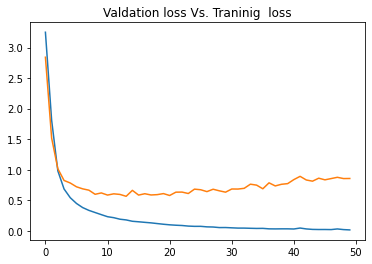

In [26]:
plt.plot(epochs_hist.history['loss'] , label = 'Validatopn_loss')
plt.plot(epochs_hist.history['val_loss'] , label = 'Validatopn_loss')
plt.title("Valdation loss Vs. Traninig  loss")

Text(0.5, 1.0, 'Val_aacuracy Vs. Traninig  accuracy')

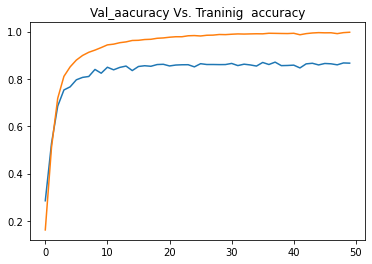

In [27]:
plt.plot(epochs_hist.history['val_accuracy'] , label = 'val_accuracy')
plt.plot(epochs_hist.history['accuracy'] , label = 'accuracy')
plt.title("Val_aacuracy Vs. Traninig  accuracy")

In [43]:
y_predict = np.argmax(LeNet.predict(X_test_gray_norm), axis=-1)
# y_true = y_test
#y_predict = np.argmax(LeNet.predict_classes(X_test_gray_norm), axis = -1)


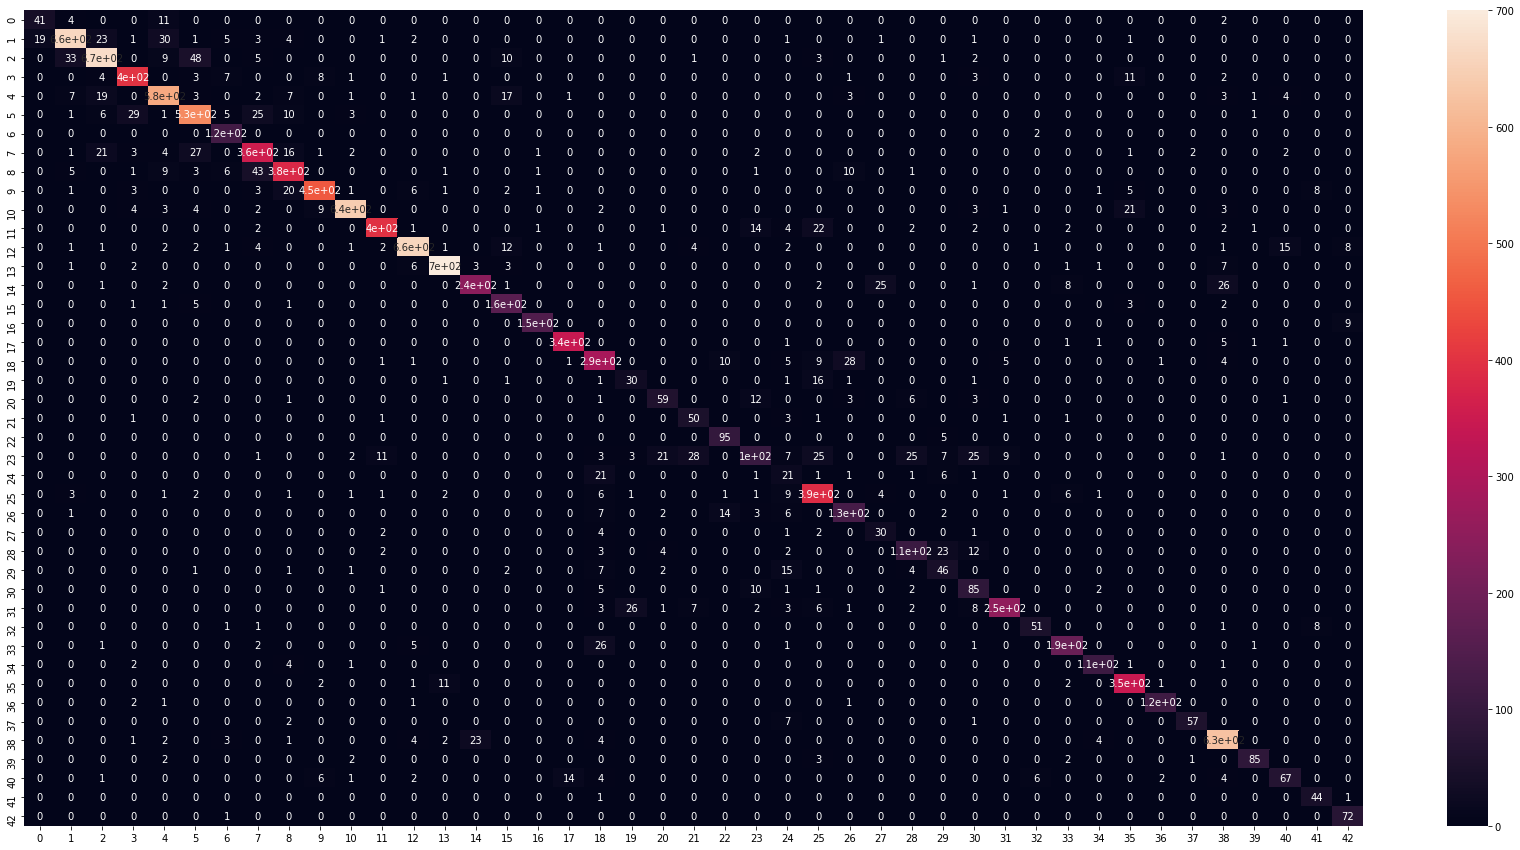

In [45]:
#from sklearn.metrics import confusion_matrix, accuracy_score, classifcation_report
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (30, 15))
sns.heatmap(confusion_matrix(y_predict, y_test), annot = True)

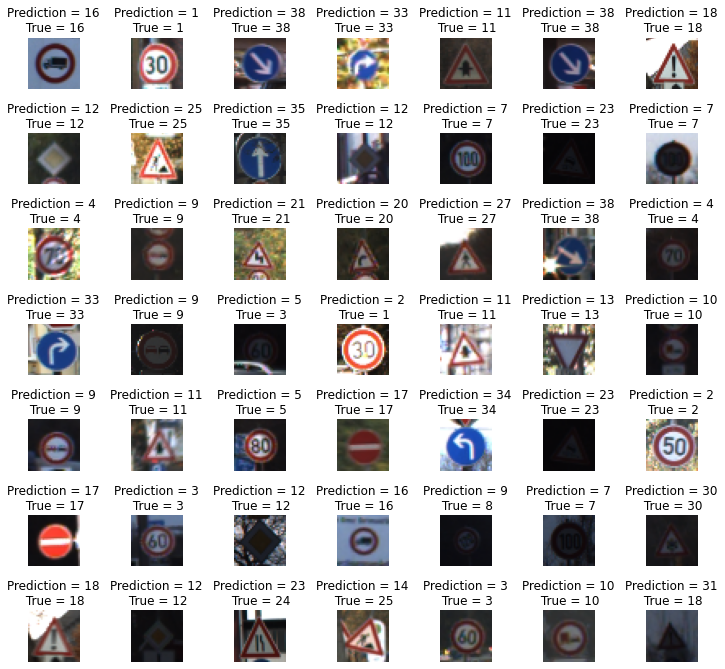

In [46]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_predict[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  